In [37]:
# ANALYSIS
# The above plots, separated into northern and southern hemispheres, help us more clearly see the patterns 
# suggested by first 4 plots.
# 1. In both hemispheres, latitude and temperature are strongly related, with temperature rising the 
# closer we get to the equator.
# 2. We are currently in summer in the northern hemisphere (it is winter in the southern hemisphere), 
# so this could explain why the temperatures in the northern hemisphere plot seem to be bunching more
# around higher temperatures.
# 3. The flatness of the linear regression lines in the Cloudiness vs. Latitude plots, along with the weak r-squared values,
# show that there is essentially no real relationship between the two factors in either hemisphere.
# 4. I would like more data to increase confidence, but there is a chance these plots support the claim that
# wind speed increases slightly the further we get from the equator (especially in southern hemisphere, where
# it is currently winter). 

In [38]:
#!pip install citipy
import requests
import os
import matplotlib.pyplot as plt
from citipy import citipy
import random
from random import seed
import pandas as pd
from api_keys import weather_api_key
from api_keys import g_key
import time
from datetime import date
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [39]:
# Get 500 random coordinates for our cities
# Some quick googling tells us that Latitudes range from -90 to 90, and longitudes range from -180 to 80.
# https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

# Seed allows us to get same list of cities every time
seed(9)
cities = []
# Pad the amount of cities, so that we may get weather info for at least 500 of them
while len(cities) < 550:
    lat = random.uniform(-90.0, 90.0)
    lon = random.uniform(-180.0, 80.0)
    city = citipy.nearest_city(lat, lon)
    city_name = city.city_name
    # Make sure we have no repeats
    if city_name not in cities:
        cities.append(city_name)
cities_final = cities.copy()

In [40]:
citi = pd.DataFrame({"Cities" : cities_final})
# Ensure we have 500 unique cities
citi['Cities'].nunique()

550

In [41]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
lats = []
longs = []
humids = []
clouds = []
windspeed = []
countrycode= []
cities_found = []
dates = []
counter = 1
for city in cities_final:  
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
   
    weather = requests.get(query_url).json()
    
    # weather[cod] = 200 means city=found, else it means city not found
    if weather['cod'] == 200:
        cities_found.append(city)
        temps.append(weather['main']['temp_max'])
        lats.append(weather['coord']['lat'])
        humids.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        windspeed.append(weather['wind']['speed'])
        longs.append(weather['coord']['lon'])
        countrycode.append(weather['sys']['country'])
        dates.append(weather['dt'])
        print(f"City number {str(counter)}, called {city}, is being processed") 
        counter += 1
        time.sleep(0.5)
# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
print(counter-1)

City number 1, called sechura, is being processed
City number 2, called port alfred, is being processed
City number 3, called ushuaia, is being processed
City number 4, called barrow, is being processed
City number 5, called bubaque, is being processed
City number 6, called saint george, is being processed
City number 7, called eureka, is being processed
City number 8, called mataura, is being processed
City number 9, called victoria, is being processed
City number 10, called biltine, is being processed
City number 11, called khorixas, is being processed
City number 12, called punta arenas, is being processed
City number 13, called faanui, is being processed
City number 14, called rikitea, is being processed
City number 15, called nome, is being processed
City number 16, called presidente epitacio, is being processed
City number 17, called hilo, is being processed
City number 18, called bereda, is being processed
City number 19, called vaini, is being processed
City number 20, called p

City number 156, called werda, is being processed
City number 157, called sitka, is being processed
City number 158, called ornskoldsvik, is being processed
City number 159, called chuy, is being processed
City number 160, called ejea de los caballeros, is being processed
City number 161, called liverpool, is being processed
City number 162, called alta floresta, is being processed
City number 163, called benguela, is being processed
City number 164, called grand gaube, is being processed
City number 165, called umm lajj, is being processed
City number 166, called praia da vitoria, is being processed
City number 167, called mizdah, is being processed
City number 168, called lincoln, is being processed
City number 169, called sao joao da barra, is being processed
City number 170, called muros, is being processed
City number 171, called bambous virieux, is being processed
City number 172, called coquimbo, is being processed
City number 173, called progreso, is being processed
City number

City number 310, called black river, is being processed
City number 311, called kontagora, is being processed
City number 312, called maraba, is being processed
City number 313, called ouadda, is being processed
City number 314, called lira, is being processed
City number 315, called saint-joseph, is being processed
City number 316, called dori, is being processed
City number 317, called mumford, is being processed
City number 318, called alcudia, is being processed
City number 319, called cavalcante, is being processed
City number 320, called jaciara, is being processed
City number 321, called yenagoa, is being processed
City number 322, called houma, is being processed
City number 323, called bhind, is being processed
City number 324, called saint-ambroise, is being processed
City number 325, called nguruka, is being processed
City number 326, called miraflores, is being processed
City number 327, called canutama, is being processed
City number 328, called berbera, is being processed

City number 464, called cranbrook, is being processed
City number 465, called krasnaya gora, is being processed
City number 466, called ignacio de la llave, is being processed
City number 467, called tarauaca, is being processed
City number 468, called caucaia, is being processed
City number 469, called port-cartier, is being processed
City number 470, called hollola, is being processed
City number 471, called araouane, is being processed
City number 472, called owando, is being processed
City number 473, called sosva, is being processed
City number 474, called tahta, is being processed
City number 475, called doka, is being processed
City number 476, called terekli-mekteb, is being processed
City number 477, called klyuchi, is being processed
City number 478, called kingisepp, is being processed
City number 479, called rio claro, is being processed
City number 480, called sumter, is being processed
City number 481, called naestved, is being processed
City number 482, called ormara, is

In [42]:
city_df = pd.DataFrame({"Cities" : cities_found, "Country": countrycode, "Temp (F)" : temps,
                       "Latitude" : lats, "Longitude" : longs, "Cloudiness (%)" : clouds,
                       "Humidity (%)" : humids, "Wind Speed (mph)" : windspeed, "Date":dates})


# Export data frame to a .csv file
filepath = os.path.join("weatherdata.csv")
city_df.to_csv(filepath)
city_df.head()

cities_clean = city_df.loc[(city_df['Humidity (%)'] <= 100)]
if city_df.shape == cities_clean.shape:
    print("There are no cities with humidity > 100%. Let's move forward.")
else:
    print("Some cities have humidity > 100%. Move forward with cities_clean data frame.")

There are no cities with humidity > 100%. Let's move forward.


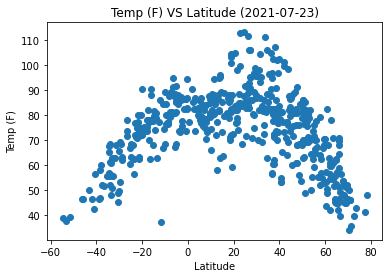

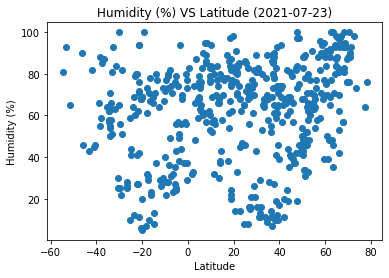

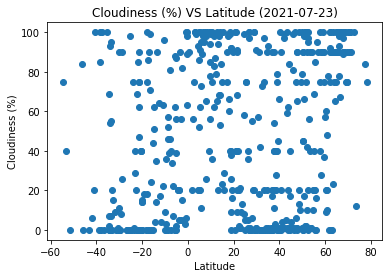

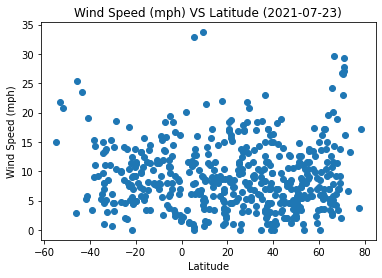

Latitude vs. Temp shows that cities closer to the equator have higher temperatures (where latitude=0).
Latitude vs. Humidity doesn't show as strong of a relationship, though humidity is a bit higher near the equator.
Latitude vs. Cloudiness shows no real relationship between cloudiness and latitude.
Latitude vs. Wind Speed shows no real relationship between wind speed and latitude, maybe slightly higher wind speeds further from the equator.


In [43]:
scatters = ['Temp (F)', 'Humidity (%)', 'Cloudiness (%)', "Wind Speed (mph)"]

for col in scatters:
    plt.scatter(city_df['Latitude'], city_df[col])
    plt.title(f"{col} VS Latitude ({date.today()})")
    plt.xlabel("Latitude")
    plt.ylabel(col)
    # save plot as a png
    plt.savefig(f"{col} VS Latitude")
    plt.show()

print("Latitude vs. Temp shows that cities closer to the equator have higher temperatures (where latitude=0).")
print("Latitude vs. Humidity doesn't show as strong of a relationship, though humidity is a bit higher near the equator.")
print("Latitude vs. Cloudiness shows no real relationship between cloudiness and latitude.")
print("Latitude vs. Wind Speed shows no real relationship between wind speed and latitude, maybe slightly higher wind speeds further from the equator.")
    

In [44]:
north_h = city_df.loc[(city_df['Latitude'] >= 0.0)]
south_h = city_df.loc[(city_df['Latitude'] < 0.0)]



The line equation for Temp (F) VS Latitude - Northern Hemisphere is y = -0.49x + 94.09
The r-squared value is: 0.38512852563992617


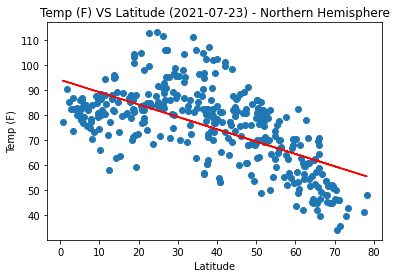

The line equation for Temp (F) VS Latitude - Southern Hemisphere is y = 0.87x + 87.91
The r-squared value is: 0.6810087821705865


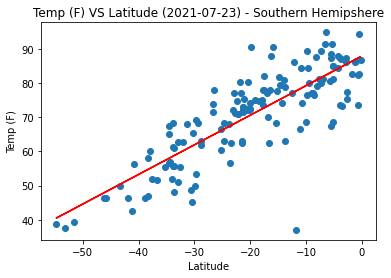

The line equation for Humidity (%) VS Latitude - Northern Hemisphere is y = 0.17x + 58.19
The r-squared value is: 0.021537228891385703


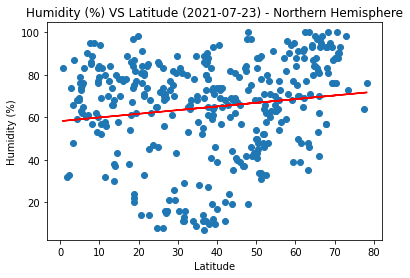

The line equation for Humidity (%) VS Latitude - Southern Hemisphere is y = -0.33x + 48.08
The r-squared value is: 0.030758667569144266


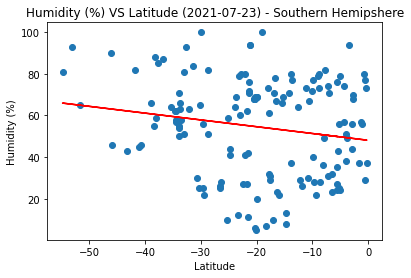

The line equation for Cloudiness (%) VS Latitude - Northern Hemisphere is y = 0.08x + 49.27
The r-squared value is: 0.0017689560449762798


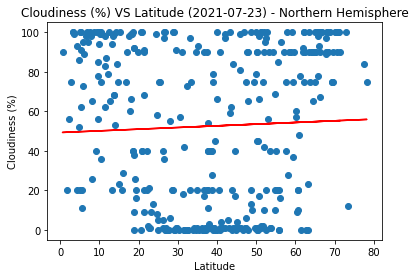

The line equation for Cloudiness (%) VS Latitude - Southern Hemisphere is y = 0.18x + 38.15
The r-squared value is: 0.004240345639801889


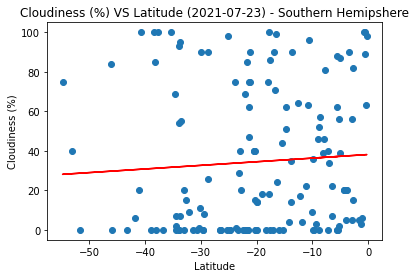

The line equation for Wind Speed (mph) VS Latitude - Northern Hemisphere is y = 0.02x + 8.06
The r-squared value is: 0.0046395586991994


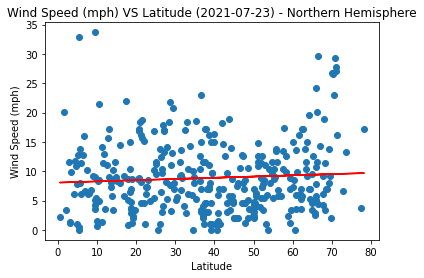

The line equation for Wind Speed (mph) VS Latitude - Southern Hemisphere is y = -0.06x + 8.22
The r-squared value is: 0.023482364625848025


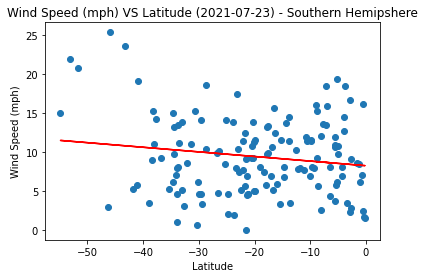

In [45]:
for col in scatters:
    # Northern Hemisphere
    plt.scatter(north_h['Latitude'], north_h[col])
    plt.title(f"{col} VS Latitude ({date.today()}) - Northern Hemisphere")
    plt.xlabel("Latitude")
    plt.ylabel(col)
    # save plot as a png
    plt.savefig(f"{col} VS Latitude - Northern Hemisphere")
    # Lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(north_h['Latitude'], north_h[col])
    regress_values = north_h['Latitude'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(north_h['Latitude'],regress_values,"r-")
    print(f"The line equation for {col} VS Latitude - Northern Hemisphere is {line_eq}")
    print(f"The r-squared value is: {rvalue**2}")
    plt.show() 
    # Southern Hemisphere
    plt.scatter(south_h['Latitude'], south_h[col])
    plt.title(f"{col} VS Latitude ({date.today()}) - Southern Hemipshere")
    plt.xlabel("Latitude")
    plt.ylabel(col)
    # save plot as a png
    plt.savefig(f"{col} VS Latitude - Southern Hemisphere")
    
     # Lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(south_h['Latitude'], south_h[col])
    regress_values = south_h['Latitude'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(south_h['Latitude'],regress_values,"r-")
    print(f"The line equation for {col} VS Latitude - Southern Hemisphere is {line_eq}")
    print(f"The r-squared value is: {rvalue**2}")
    
    plt.show()